<a href="https://colab.research.google.com/github/Cann-Emma/R/blob/main/Visualization2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VISUALIZATION CONTINUED

In [11]:
install.packages('nycflights13')
library(nycflights13)
library(dplyr)
library(ggplot2)
library(RColorBrewer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
Thanksgiving_data=flights%>%inner_join(airlines, by="carrier")%>%rename(airline_name=name)%>%mutate(date=as.Date(time_hour))%>%filter(date>="2013-11-24" & date<="2013-11-30")

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


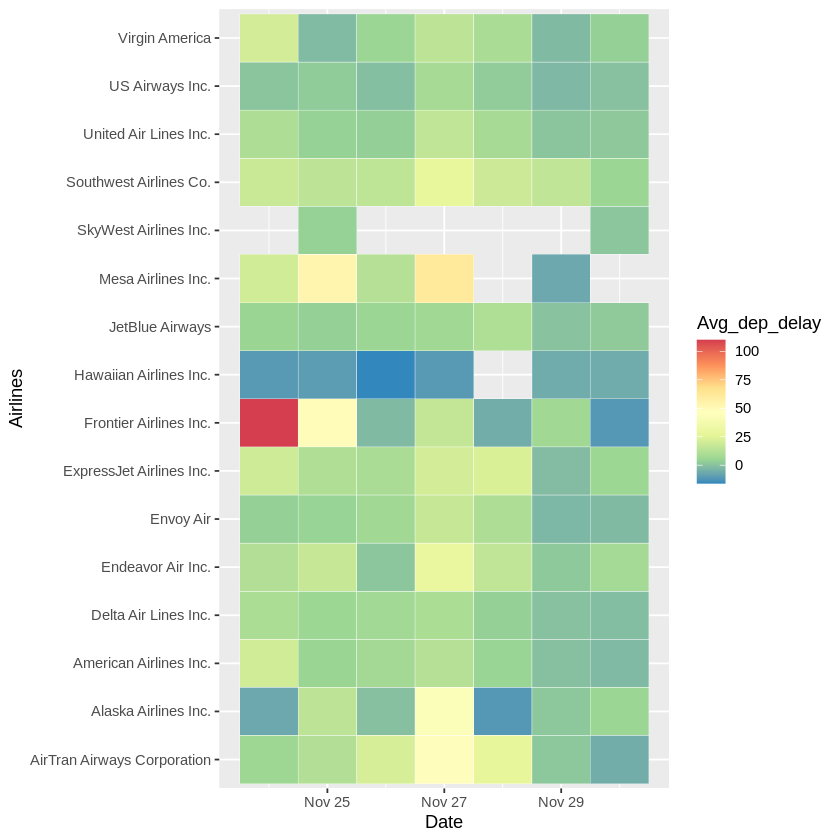

In [17]:
TG_dat= Thanksgiving_data%>%group_by(date, airline_name)%>%summarise(Avg_dep_delay= round(mean(dep_delay, na.rm=T),2))
TG_dat%>%ggplot(aes(x= date, y=airline_name, fill= Avg_dep_delay))+geom_tile(color= 'white')+scale_fill_distiller(palette= 'Spectral')+labs(x= 'Date', y= 'Airlines')

In [19]:
glimpse(Thanksgiving_data)

Rows: 5,929
Columns: 21
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,…
$ day            <int> 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,…
$ dep_time       <int> 1852, 1855, 1856, 1857, 1858, 1904, 1915, 1918, 1921, 1…
$ sched_dep_time <int> 1900, 1900, 1901, 1900, 1900, 1910, 1915, 1925, 1930, 1…
$ dep_delay      <dbl> -8, -5, -5, -3, -2, -6, 0, -7, -9, -1, -6, -5, -5, -3, …
$ arr_time       <int> 2107, 2347, 2311, 2224, 2215, 2157, 2141, 2211, 2138, 1…
$ sched_arr_time <int> 2140, 2359, 2240, 2246, 2215, 2205, 2133, 2245, 2138, 3…
$ arr_delay      <dbl> -33, -12, 31, -22, 0, -8, 8, -34, 0, -20, 28, 9, -10, 1…
$ carrier        <chr> "MQ", "AA", "DL", "DL", "AA", "DL", "9E", "AA", "EV", "…
$ flight         <int> 3473, 1029, 245, 434, 21, 2159, 2919, 2437, 4361, 347, …
$ tailnum        <chr> "N532MQ", "N5EFAA", "N3756", "N721TW", "N336AA", "N941D…
$ origin        

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


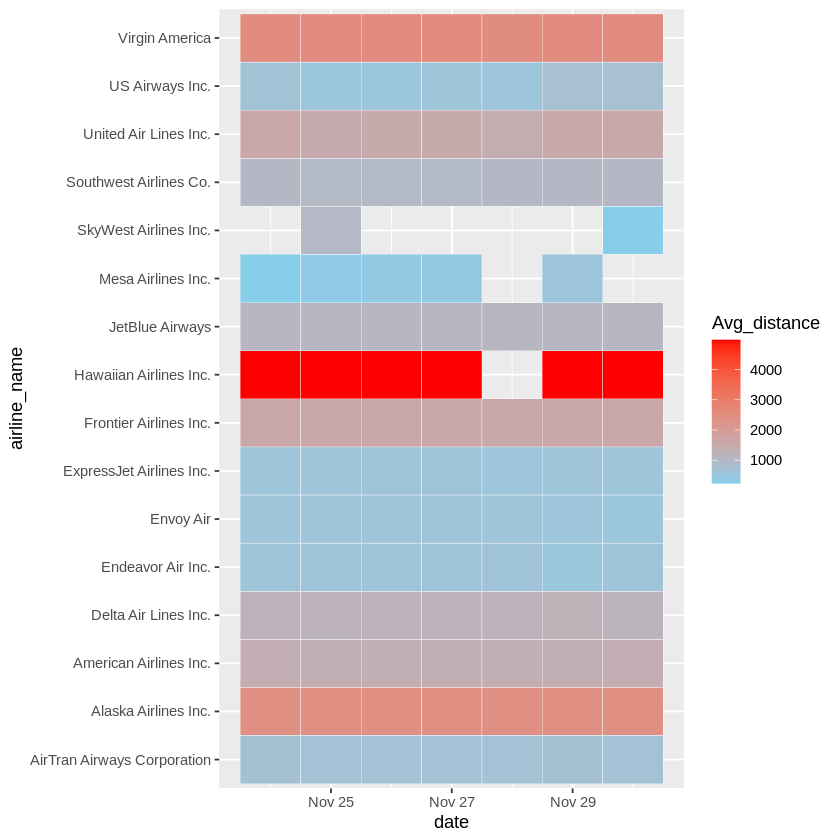

In [23]:
Distance= Thanksgiving_data%>%group_by(date,airline_name)%>%summarise(Avg_distance= mean(distance))
Distance%>%ggplot(aes(x= date, y= airline_name , fill= Avg_distance ))+geom_tile(color= 'white')+scale_fill_gradient(low= 'skyblue', high = 'red')

In [35]:
glimpse(flights)
glimpse(airlines)

Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394…
$ origin      

In [38]:
Christmas_data= flights%>%inner_join(airlines, by="carrier")%>%rename(airline_name=name)%>%
mutate(date=as.Date(time_hour))%>%filter(date>="2013-12-21" & date<= "2013-12-31")
XMAS= Christmas_data%>%group_by(date, origin)%>%summarize(M_Depdelay= round(mean(dep_delay, na.rm= T), 1))
print(XMAS)

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


# A tibble: 33 × 3
# Groups:   date [11]
   date       origin M_Depdelay
   <date>     <chr>       <dbl>
 1 2013-12-21 EWR          28  
 2 2013-12-21 JFK          19.4
 3 2013-12-21 LGA          15.8
 4 2013-12-22 EWR          41.6
 5 2013-12-22 JFK          15.4
 6 2013-12-22 LGA          19.8
 7 2013-12-23 EWR          41.7
 8 2013-12-23 JFK          28.4
 9 2013-12-23 LGA          19.6
10 2013-12-24 EWR          21.5
# ℹ 23 more rows


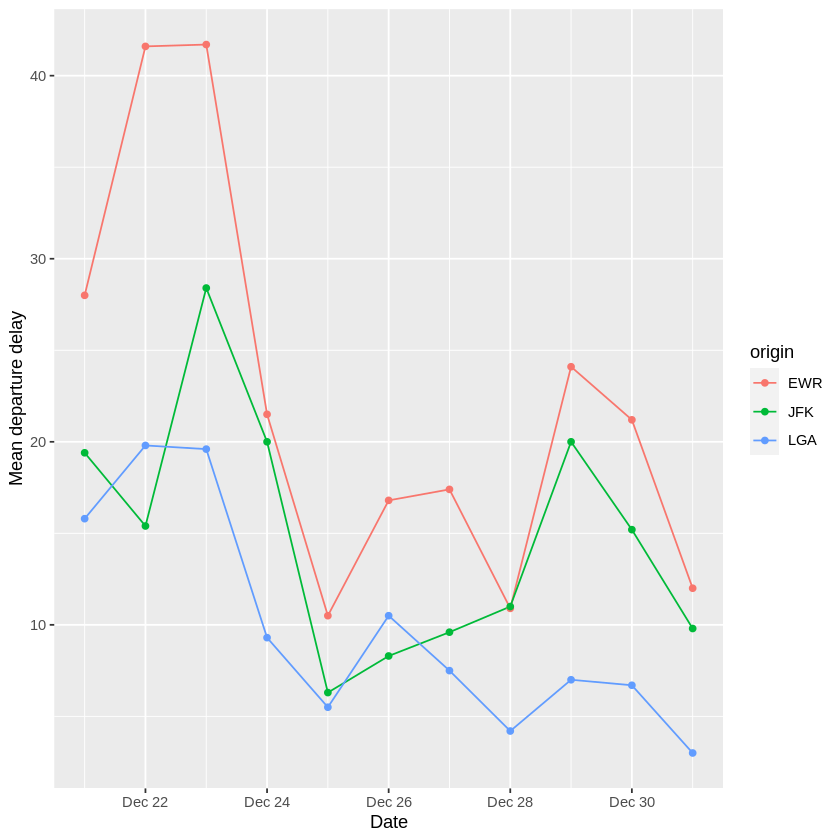

In [42]:
XMAS%>%ggplot(aes(x= date, y=M_Depdelay, colour= origin))+geom_line()+geom_point()+labs(x= 'Date', y= 'Mean departure delay')